In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Data preprocessing

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
(x_train,y_train),(x_test, y_test) = imdb.load_data(num_words = 20000)

In [4]:
x_train

# reviews are encoded with numbers, it is a bag of words where the words are encoded as numbers
# those numbers are vary in length they don't have a fixed length
# to do that by applying padding



array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [5]:
# applying padding

x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)


In [6]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

In [7]:
# Building the model

# define an object(initialize RNN)

model = tf.keras.models.Sequential()



In [8]:
# Embedding layer - Compress the input Feature Space to 1

model.add(tf.keras.layers.Embedding(input_dim = 20000, 
                                    output_dim = 128,
                                    input_shape = (100,)))



In [9]:
# Adding LSTM layer

model.add(tf.keras.layers.LSTM(units =128 ,
                               activation = 'tanh'))

In [10]:
# output layer

model.add(tf.keras.layers.Dense(units = 1,
                               activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compiling the model


model.compile(loss = 'binary_crossentropy',
             metrics = ['accuracy'],
             optimizer = 'rmsprop' )

# for sequences 'RMSPROP' works better than 'ADAM'

In [13]:
# Training the model

history = model.fit(x_train, y_train, 
          batch_size = 128, 
          epochs = 5, 
          validation_data = (x_test, y_test),
          verbose = 1)

Epoch 1/5
196/196 [==============================] - 31s 150ms/step - loss: 0.4677 - accuracy: 0.7746 - val_loss: 0.3882 - val_accuracy: 0.8334
Epoch 2/5
196/196 [==============================] - 28s 145ms/step - loss: 0.2862 - accuracy: 0.8834 - val_loss: 0.6808 - val_accuracy: 0.8143
Epoch 3/5
196/196 [==============================] - 29s 147ms/step - loss: 0.2236 - accuracy: 0.9153 - val_loss: 0.3677 - val_accuracy: 0.8444
Epoch 4/5
196/196 [==============================] - 30s 151ms/step - loss: 0.1832 - accuracy: 0.9322 - val_loss: 0.5219 - val_accuracy: 0.8350
Epoch 5/5
196/196 [==============================] - 29s 149ms/step - loss: 0.1451 - accuracy: 0.9477 - val_loss: 0.4863 - val_accuracy: 0.7895


In [14]:
# Predictions

y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

In [15]:
y_pred[10], y_test[1]

(array([1]), 1)

In [16]:
y_pred[234], y_test[234]

(array([0]), 0)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[11294,  1206],
       [ 4056,  8444]], dtype=int64)

<AxesSubplot:>

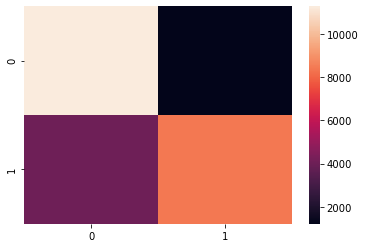

In [18]:
import seaborn as sns
sns.heatmap(data = cm)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: ...{accuracy} %")

Accuracy: ...0.78952 %


In [20]:
def learning_accuracy_curve(history, epoch):

  # Training Vs Accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation')
  

In [21]:
def learning_loss_curve(history, epoch): 
    
  # Training Vs Validation Loss
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation')

In [22]:
import warnings

warnings.filterwarnings('ignore')

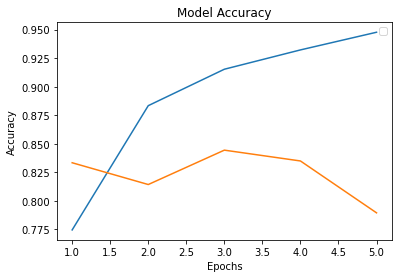

In [25]:
learning_accuracy_curve(history, epoch = 5)


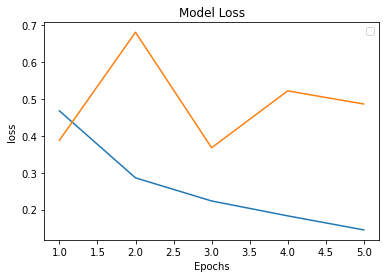

In [26]:
learning_loss_curve(history, epoch = 5)

In [ ]:
2